In [28]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_bangalore = pd.read_excel("bangalore_cars.xlsx")
df_bangalore['Location']='Bangalore'

df_chennai = pd.read_excel("chennai_cars.xlsx")
df_chennai['Location']='Chennai'

df_kolkata = pd.read_excel("kolkata_cars.xlsx")
df_kolkata['Location']='Kolkata'

df_delhi = pd.read_excel("delhi_cars.xlsx")
df_delhi['Location']='Delhi'

df_jaipur = pd.read_excel("jaipur_cars.xlsx")
df_jaipur['Location']='Jaipur'

df_hyderabad = pd.read_excel("hyderabad_cars.xlsx")
df_hyderabad['Location'] = 'Hyderabad'



In [6]:
df_concat= pd.concat([df_bangalore, df_chennai, df_kolkata, df_delhi,df_jaipur,df_hyderabad],axis = 0)
df_concat.to_excel('all_cities_cars.xlsx', index=False)

In [7]:
df = pd.read_excel("all_cities_cars.xlsx")
df.shape

(8369, 6)

In [8]:
df.drop('car_links', axis=1, inplace=True)

#    UnStructered  to Structured

In [9]:
#Checking to see type of the values in column
print(type(df['new_car_detail'].iloc[0]))
print(type(df['new_car_overview'].iloc[0]))
print(type(df['new_car_feature'].iloc[0]))
print(type(df['new_car_specs'].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)
df['new_car_feature'] = df['new_car_feature'].apply(ast.literal_eval)
df['new_car_specs'] = df['new_car_specs'].apply(ast.literal_eval)

In [11]:
expanded_details = pd.json_normalize(df['new_car_detail'])
expanded_details.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [12]:
#new_car_overview
def process_row(row):
    top_data = {item['key']: item['value'] for item in row['top']}
    return top_data

expanded_overview = df['new_car_overview'].apply(lambda row: pd.Series(process_row(row)))

expanded_overview.head(1)

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0


In [13]:
# new_car_feature
def process_features(row):
    features = {}

    # Flatten 'top' values
    for item in row['top']:
        features[item['value']] = True
    
    # Flatten 'data' values
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            features[sub_item['value']] = True
    
    return features

expanded_features = df['new_car_feature'].apply(lambda row: pd.Series(process_features(row)))

expanded_features.head(1)

,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,...,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#new_car_specs
def process_specifications(row):
    specs = {}

    # Flatten 'top' values
    for item in row['top']:
        specs[item['key']] = item['value']
    
    # Flatten 'data' values
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            specs[sub_item['key']] = sub_item['value']
    
    return specs

expanded_specs = df['new_car_specs'].apply(lambda row: pd.Series(process_specifications(row)))

expanded_specs.head(1)

,Mileage,Engine,Max Power,Torque,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,23.1 kmpl,998 CC,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,998,90Nm@3500rpm,3.0,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN


In [15]:
# Merge
df_expanded=pd.concat([expanded_details,expanded_overview,expanded_features,expanded_specs,df['Location']],axis=1)

df_expanded.to_excel('all_cities_cars_expanded.xlsx', index=False)

In [16]:
df_expanded.to_csv('Cities.csv')

In [17]:
df = df_expanded

#    Data Processing

In [18]:
df =  pd.read_csv('Cities.csv')
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_14060\2114196901.py:1: DtypeWarning: Columns (145,165,191,195,196,198,199,200,202) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('Cities.csv')


,Unnamed: 0,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,Location
0,0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore
1,1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore
2,2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore
3,3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore
4,4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore


In [20]:
# Dropping the 'Unnamed: 0' column from the DataFrame
df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,Location
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,...,Disc & Caliper Type,175 kmph,12.5 Seconds,"Tubeless,Radial",5.0,NaN,17,17,NaN,Hyderabad
8365,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,...,Disc,250 Kmph,6.4 Seconds,"Tubeless,Radial",4.0,540-litres,20,20,NaN,Hyderabad
8366,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,...,Ventilated Disc,235kmph,7.5,"Tubeless, Runflat",4.0,520-litres,R18,R18,NaN,Hyderabad
8367,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,...,Drum,154.19 kmph,13.25 Seconds,Tubeless Radial Tyres,5.0,350,NaN,NaN,209 mm,Hyderabad


In [22]:
df.isna().sum()

it                             0
ft                             0
bt                             4
km                             0
transmission                   0
                            ... 
Cargo Volumn                1593
Wheel Size                  2983
Alloy Wheel Size            2983
Ground Clearance Unladen    7854
Location                       0
Length: 243, dtype: int64

In [23]:
#Missing values and drop columns
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)
df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Location
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,Bangalore


In [24]:
df.nunique()

it                     1
ft                     5
bt                    10
km                  4090
transmission           2
                    ... 
No Door Numbers        5
Cargo Volumn         321
Wheel Size            17
Alloy Wheel Size      17
Location               6
Length: 122, dtype: int64

In [25]:
df = df.loc[:, df.nunique() > 1]
df

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Location
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,Bangalore
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,Bangalore
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,Bangalore
3,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,Bangalore
4,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,3823,...,Disc & Caliper Type,Disc & Caliper Type,175 kmph,12.5 Seconds,"Tubeless,Radial",5.0,NaN,17,17,Hyderabad
8365,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,5007,...,Disc,Disc,250 Kmph,6.4 Seconds,"Tubeless,Radial",4.0,540-litres,20,20,Hyderabad
8366,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,250,...,Ventilated Disc,Ventilated Disc,235kmph,7.5,"Tubeless, Runflat",4.0,520-litres,R18,R18,Hyderabad
8367,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,6500,...,Disc,Drum,154.19 kmph,13.25 Seconds,Tubeless Radial Tyres,5.0,350,NaN,NaN,Hyderabad


In [26]:
df.duplicated().sum()

np.int64(85)

In [29]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

In [30]:
df.drop(['owner','centralVariantId','Fuel Type','Registration Year','Year of Manufacture','Engine Displacement','Transmission','Max Power','Torque','Wheel Size','Seats.1','Engine','Torque','Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Values per Cylinder','Value Configuration','Seats','Turning Radius','Top Speed','Acceleration','Alloy Wheel Size','Kms Driven','Ownership','Max Torque','Cargo Volumn'],axis=1,inplace=True)
df.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,...,No,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,Bangalore


In [31]:
df.dtypes

ft                     object
bt                     object
km                     object
transmission           object
ownerNo                 int64
oem                    object
model                  object
modelYear               int64
variantName            object
price                  object
Insurance Validity     object
RTO                    object
Mileage                object
Color                  object
Engine Type            object
Displacement          float64
No of Cylinder        float64
Fuel Suppy System      object
Turbo Charger          object
Super Charger          object
Gear Box               object
Drive Type             object
Seating Capacity      float64
Steering Type          object
Front Brake Type       object
Rear Brake Type        object
Tyre Type              object
No Door Numbers       float64
Location               object
dtype: object

In [32]:
# price 

def convert_price(price_str):
    # Remove the currency symbol and commas
    price_str = re.sub(r'[₹,]', '', price_str).strip()
    
    # Handle different units
    if 'Crore' in price_str:
        price_str = price_str.replace('Crore', '').strip()
        return float(price_str) * 10000000  # Convert to the base unit (e.g., rupees)
    elif 'Lakh' in price_str:
        price_str = price_str.replace('Lakh', '').strip()
        return float(price_str) * 100000  # Convert to the base unit (e.g., rupees)
    elif 'Thousand' in price_str:
        price_str = price_str.replace('Thousand', '').strip()
        return float(price_str) * 1000  # Convert to the base unit (e.g., rupees)
    else:
        return float(price_str)  # Assume it's already in the base unit (e.g., rupees)

# Apply the conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)
df.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,...,No,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,Bangalore


In [33]:
# km
def convert_km(km_str):
    # Remove commas
    km_str = re.sub(r',', '', km_str).strip()
    # Convert to float
    return float(km_str)

# Apply the conversion function to the 'km' column
df['km'] = df['km'].apply(convert_km)
df.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,...,No,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,Bangalore


In [34]:
# Mileage

def clean_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower()

    if 'km/kg' in value:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)*0.74
        return value_float

    else:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)
        return value_float

df['Mileage'] = df['Mileage'].apply(clean_mileage)
df.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,...,No,5 Speed,FWD,5.0,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,Bangalore


In [35]:
df.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
RTO                    874
Mileage                285
Color                    3
Engine Type            290
Displacement             4
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               106
Drive Type            1540
Seating Capacity         6
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
Location                 0
dtype: int64

In [36]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Displacement'].fillna(df['Displacement'].median(), inplace=True)
df['No of Cylinder'].fillna(df['No of Cylinder'].median(), inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].median(), inplace=True)
df['No Door Numbers'].fillna(df['Seating Capacity'].median(), inplace=True)

In [37]:
df.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
RTO                    874
Mileage                  0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               106
Drive Type            1540
Seating Capacity         0
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers          0
Location                 0
dtype: int64

In [38]:
# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km','price','modelYear','Mileage','Displacement']
df_cars = remove_outliers_zscore(df, columns_to_check)
df_cars.shape

(7838, 29)

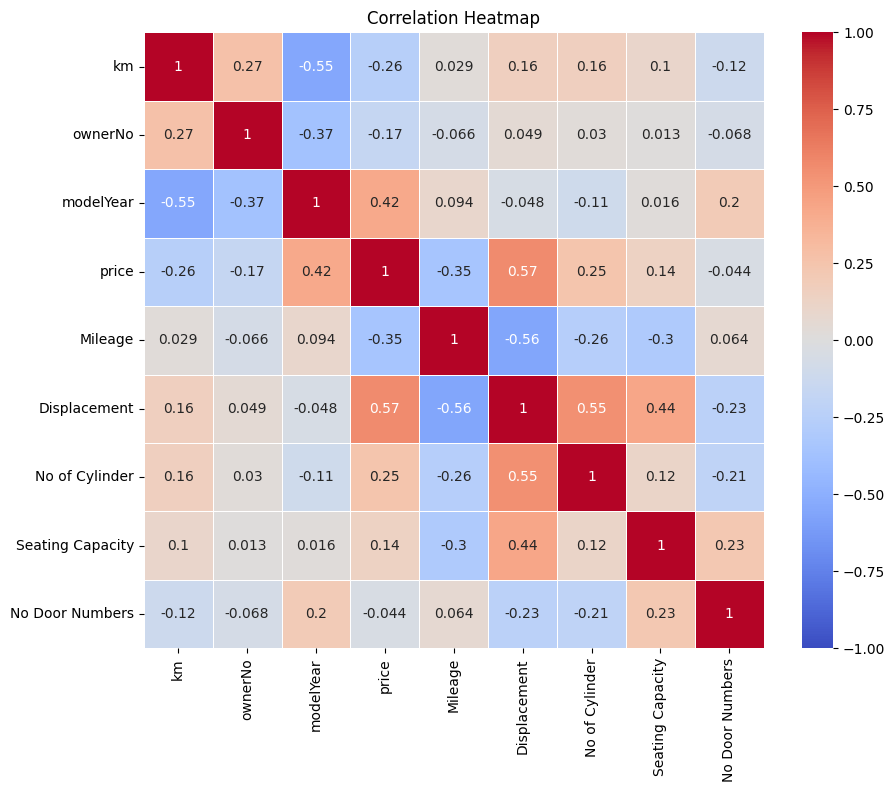

Correlation with 'price':
km                 -0.256213
ownerNo            -0.169339
modelYear           0.421369
price               1.000000
Mileage            -0.346918
Displacement        0.565857
No of Cylinder      0.245100
Seating Capacity    0.137682
No Door Numbers    -0.043681
Name: price, dtype: float64


In [39]:
# heatmap for numerical columns

numeric_df = df_cars.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation with 'price'
correlation_with_price = correlation_matrix['price']

# Print the correlation matrix with 'price'
print("Correlation with 'price':")
print(correlation_with_price)

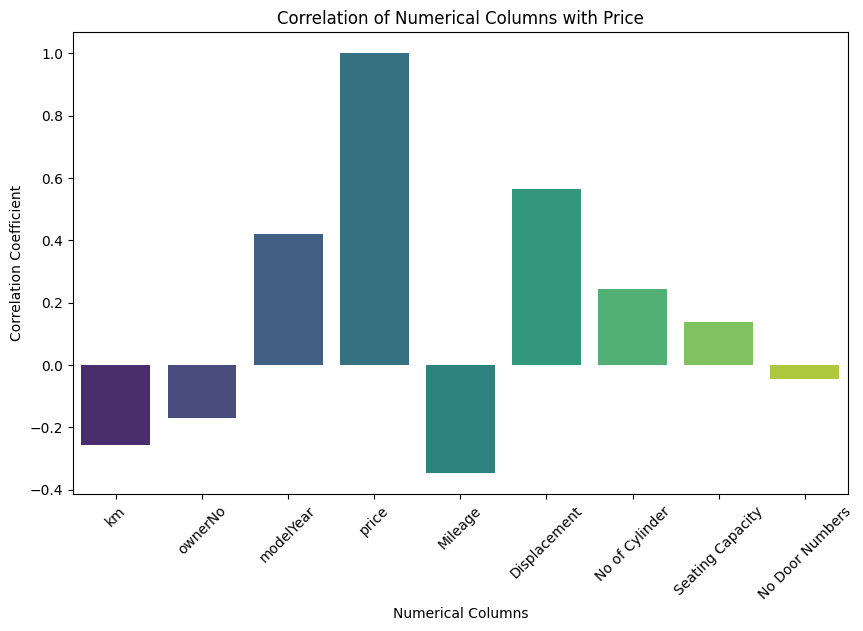

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [41]:
# dropping columns not required according to co-relation with price but can keep ownerNo as it makes sense

df_cars.drop(['Seating Capacity','No Door Numbers','No of Cylinder','ownerNo','Mileage'],axis=1, inplace=True)
df_cars.head(1)

,ft,bt,km,transmission,oem,model,modelYear,variantName,price,Insurance Validity,...,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Location
0,Petrol,Hatchback,120000.0,Manual,Maruti,Maruti Celerio,2015,VXI,400000.0,Third Party insurance,...,MPFi,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",Bangalore


In [42]:
df_cars.iloc[0]

ft                                   Petrol
bt                                Hatchback
km                                 120000.0
transmission                         Manual
oem                                  Maruti
model                        Maruti Celerio
modelYear                              2015
variantName                             VXI
price                              400000.0
Insurance Validity    Third Party insurance
RTO                                    KA51
Color                                 White
Engine Type                     K10B Engine
Displacement                          998.0
Fuel Suppy System                      MPFi
Turbo Charger                            No
Super Charger                            No
Gear Box                           5 Speed 
Drive Type                              FWD
Steering Type                         Power
Front Brake Type            Ventilated Disc
Rear Brake Type                        Drum
Tyre Type                  Tubel

In [43]:
df_cars.isna().sum()

ft                       0
bt                       3
km                       0
transmission             0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
RTO                    823
Color                    0
Engine Type            233
Displacement             0
Fuel Suppy System     1591
Turbo Charger          957
Super Charger         1811
Gear Box                59
Drive Type            1454
Steering Type          230
Front Brake Type        61
Rear Brake Type         61
Tyre Type               54
Location                 0
dtype: int64

In [44]:
rto_mapping = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OR': 'Odisha',
    'PY': 'Puducherry',
    'Unknown': 'Unknown'
}

In [45]:
# Function to map RTO values
def map_rto(rto):
    if pd.isna(rto):
        return 'Unknown'
    rto_str = str(rto)  # Convert value to string
    for key in rto_mapping:
        if rto_str.startswith(key):
            return rto_mapping[key]
    return 'Unknown'

# Convert float values to 'Unknown'
df_cars['RTO'] = df_cars['RTO'].fillna('Unknown')

# Apply the function to the DataFrame
df_cars['RTO_grouped'] = df_cars['RTO'].apply(map_rto)
df_cars.drop('RTO',axis=1,inplace=True)
df_cars.head(1)

,ft,bt,km,transmission,oem,model,modelYear,variantName,price,Insurance Validity,...,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Location,RTO_grouped
0,Petrol,Hatchback,120000.0,Manual,Maruti,Maruti Celerio,2015,VXI,400000.0,Third Party insurance,...,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",Bangalore,Karnataka


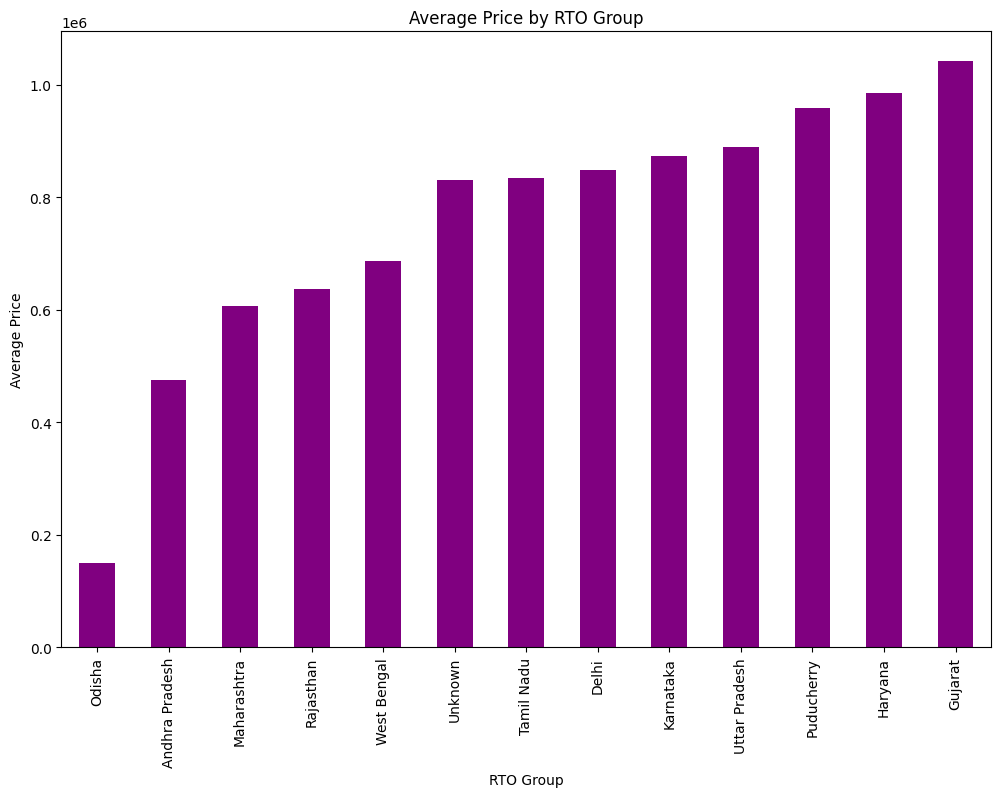

In [48]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('RTO_grouped')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by RTO Group')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

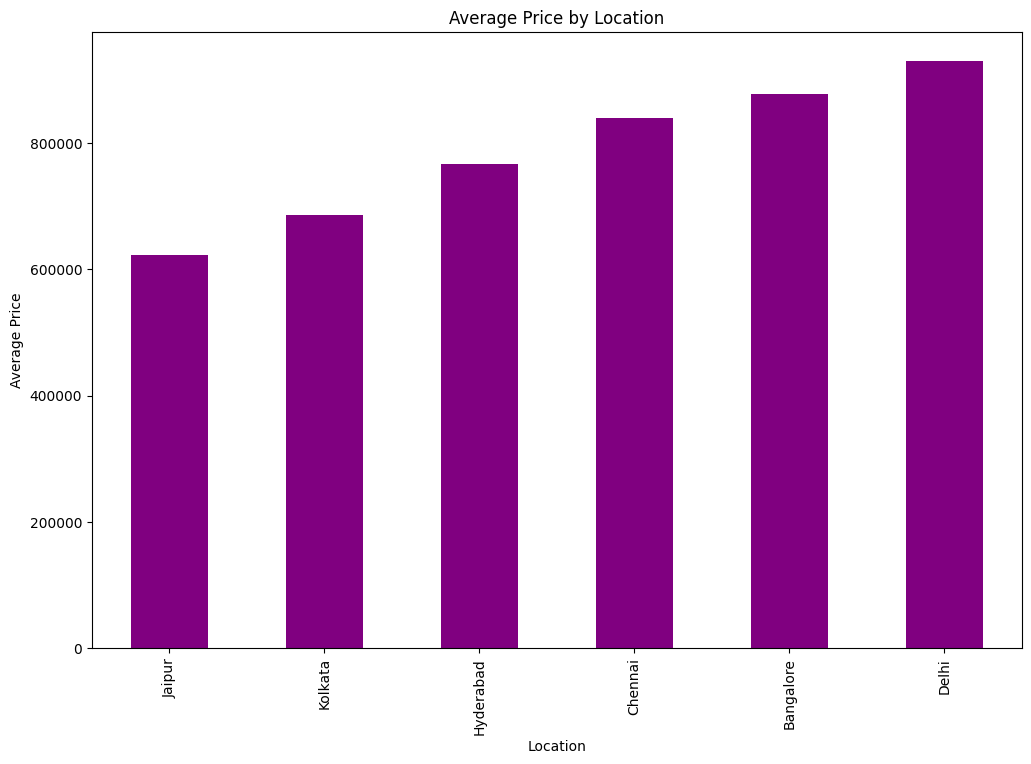

In [49]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('Location')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.show()

In [50]:
def determine_color(color):
    color_lower = color.lower()
    
    if 'white' in color_lower:
        return 'White'
    elif 'red' in color_lower or 'wine' in color_lower or 'cherry' in color_lower:
        return 'Red'
    elif 'blue' in color_lower:
        return 'Blue'
    elif 'brown' in color_lower:
        return 'Brown'
    elif 'gold' in color_lower:
        return 'Gold'
    elif 'green' in color_lower:
        return 'Green'
    elif 'black' in color_lower:
        return 'Black'     
    elif 'orange' in color_lower:
        return 'Orange'
    elif 'yellow' in color_lower:
        return 'Yellow'
    elif 'bronze' in color_lower:
        return 'Bronze'
    elif 'purple' in color_lower:
        return 'Purple'
    elif 'grey' in color_lower or 'gray' in color_lower:
        return 'Gray'
    elif 'silver' in color_lower or 'metal' in color_lower or 'steel' in color_lower:
        return 'Silver'
    else:
        return 'Other'  # Returns Other if no condition is met

# Apply the function to the DataFrame column
df_cars['Color'] = df_cars['Color'].apply(determine_color)
df_cars['Color'].value_counts()

Color
Other     2138
White     1552
Silver    1266
Red        806
Gray       614
Blue       577
Black      378
Brown      273
Orange     101
Gold        57
Green       42
Yellow      19
Purple      10
Bronze       5
Name: count, dtype: int64

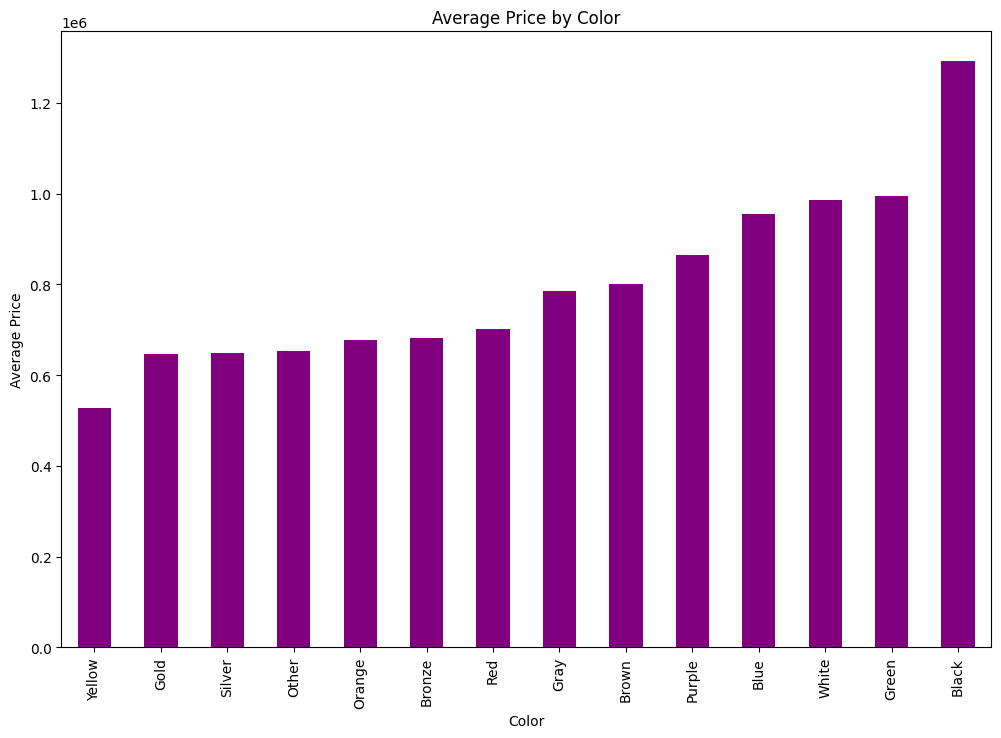

In [52]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('Color')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

In [53]:
df_cars['Insurance Validity'].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', nan, '2', '1', 'Not Available'], dtype=object)

In [54]:
df_cars['Insurance Validity']= df_cars['Insurance Validity'].replace('Third Party insurance','Third Party')

In [55]:
df_cars['Insurance Validity'].value_counts()

Insurance Validity
Third Party      4410
Comprehensive    2907
Zero Dep          297
Not Available     216
1                   3
2                   1
Name: count, dtype: int64

In [56]:
df_cars = df_cars[~df_cars['Insurance Validity'].isin(['1', '2'])]
df_cars['Insurance Validity'].fillna('Not Available', inplace=True)
df_cars['Insurance Validity'].value_counts()

Insurance Validity
Third Party      4410
Comprehensive    2907
Zero Dep          297
Not Available     220
Name: count, dtype: int64

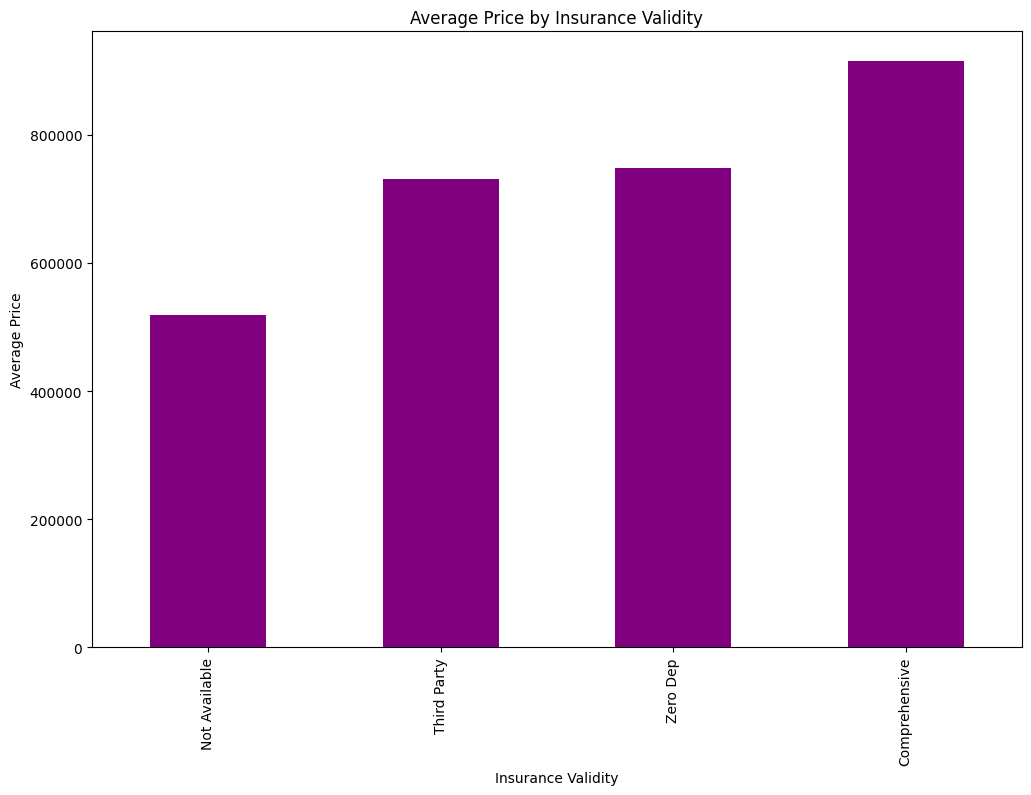

In [58]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('Insurance Validity')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

In [59]:
print(df_cars['Engine Type'].head())
print(df_cars['Engine Type'].isna().sum())
print(df_cars['Engine Type'].value_counts())
df_cars.drop('Engine Type',axis=1,inplace=True)

0                 K10B Engine
1        Ti-VCT Petrol Engine
2             Revotron Engine
3    Kappa VTVT Petrol Engine
4      DDiS 200 Diesel Engine
Name: Engine Type, dtype: object
233
Engine Type
In-Line Engine                     437
Kappa VTVT Petrol Engine           424
Petrol Engine                      309
i-VTEC Petrol Engine               266
i VTEC Engine                      199
                                  ... 
Dicor Diesel Engine                  1
4Cylinder Turbo Intercool            1
Water Cooled Inline i-DTEC DOHC      1
m2DiCR 4 cly 2.5L TB                 1
K Series Engine                      1
Name: count, Length: 447, dtype: int64


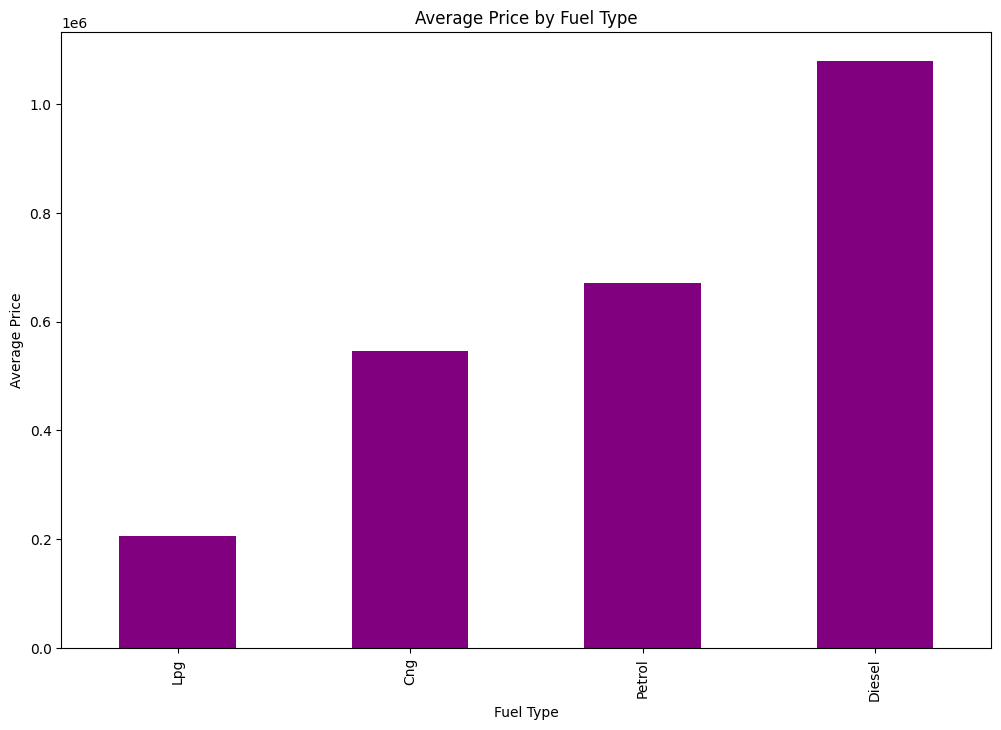

In [61]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

In [62]:
#combining cng and lpg to gas 
df_cars['ft']= df_cars['ft'].replace('Cng','Gas')
df_cars['ft']= df_cars['ft'].replace('Lpg','Gas')

#dropping bt 
df_cars.drop(['bt'], axis=1,inplace=True)

In [63]:
print('Null values(oem):',df_cars['oem'].isna().sum())
print('unique elements and its occurance(oem):',df_cars['oem'].value_counts())
print('no. of unique elements (oem):',df_cars['oem'].nunique())

print('\nNull values(model):',df_cars['model'].isna().sum())
print('unique elements and its occurance(model):',df_cars['model'].value_counts())
print('no. of unique elements(model):',df_cars['model'].nunique())

print('\nNull values(variantName):',df_cars['variantName'].isna().sum())
print('unique elements and its occurance(variantName):',df_cars['variantName'].value_counts())
print('no. of unique elements(variantName)',df_cars['variantName'].nunique())

Null values(oem): 0
unique elements and its occurance(oem): oem
Maruti                2170
Hyundai               1625
Honda                  852
Tata                   408
Mahindra               364
Renault                309
Volkswagen             286
Ford                   283
Toyota                 245
Skoda                  158
Kia                    155
Mercedes-Benz          151
Audi                   129
BMW                    122
Jeep                   108
MG                      83
Nissan                  78
Chevrolet               76
Datsun                  74
Volvo                   37
Fiat                    30
Jaguar                  25
Land Rover              22
Mini                    11
Mitsubishi               9
Citroen                  8
Mahindra Renault         5
Mahindra Ssangyong       4
Lexus                    2
Hindustan Motors         2
Isuzu                    2
Porsche                  1
Name: count, dtype: int64
no. of unique elements (oem): 32

Null values(

In [64]:
df_cars = df_cars.copy()
df_cars.drop(['variantName'], axis=1,inplace=True)

In [65]:
freq_oem = df_cars['oem'].value_counts()
freq_model = df_cars['model'].value_counts()

# Define threshold
threshold = len(df_cars) * 0.005

# Identify categories to keep and filter 
categories_to_keep_oem = freq_oem[freq_oem >= threshold].index
df_cars = df_cars[df_cars['oem'].isin(categories_to_keep_oem)]

categories_to_keep_model= freq_model[freq_model >= threshold].index
df_cars = df_cars[df_cars['model'].isin(categories_to_keep_model)]

df_cars.shape

(5822, 21)

In [66]:
print(df_cars['Fuel Suppy System'].value_counts())
print(df_cars['Fuel Suppy System'].unique())
print(df_cars['Fuel Suppy System'].nunique())
print(df_cars['Fuel Suppy System'].isna().sum())

Fuel Suppy System
MPFI                                  1797
MPFi                                   688
CRDI                                   543
Direct Injection                       462
CRDi                                   451
PGM-Fi                                 199
PGM - Fi                               156
GDi                                     83
Common Rail                             48
MPI                                     41
MPi                                     37
EFI(Electronic Fuel Injection)          35
MPFI                                    33
EFI (Electronic Fuel Injection)         26
Direct Injection                        25
SEFI                                    20
TSI                                     15
CDI                                     11
Multi Point Fuel Injection               9
PGM-FI (Programmed Fuel Injection)       9
MPFI+LPG                                 6
GDI                                      5
Common Rail Direct Injection (dCi)  

In [68]:
df_cars.drop('Fuel Suppy System', axis=1, inplace=True)

In [69]:
print(df_cars['Turbo Charger'].value_counts())
print(df_cars['Turbo Charger'].unique())
print(df_cars['Turbo Charger'].nunique())
print(df_cars['Turbo Charger'].isna().sum())
print('\n',df_cars['Super Charger'].value_counts())
print(df_cars['Super Charger'].unique())
print(df_cars['Super Charger'].nunique())
print(df_cars['Super Charger'].isna().sum())

Turbo Charger
No     3475
Yes    1548
NO       20
yes       1
Name: count, dtype: int64
['No' 'Yes' 'NO' nan 'yes']
4
778

 Super Charger
No    4635
Name: count, dtype: int64
['No' nan]
1
1187


In [70]:
mapping = {
    'No':False,
    'NO':False,
    'no':False,
    None:False,

    'Yes':True,
    'YES':True,
    'yes':True,
    'Turbo':True,
    'Twin':True,
}
df_cars['Turbo Charger'] = df_cars['Turbo Charger'].map(mapping).fillna(False)

print(df_cars['Turbo Charger'].value_counts())
print(df_cars['Turbo Charger'].unique())
print(df_cars['Turbo Charger'].nunique())
print(df_cars['Turbo Charger'].isna().sum())
print(df_cars['Turbo Charger'].dtype)

Turbo Charger
False    4273
True     1549
Name: count, dtype: int64
[False  True]
2
0
bool


In [71]:
mapping = {
    'No':False,
    'NO':False,
    'no':False,

    'Yes':True,
    
}
df_cars['Super Charger'] = df_cars['Super Charger'].map(mapping).fillna(False)

print(df_cars['Super Charger'].value_counts())
print(df_cars['Super Charger'].unique())
print(df_cars['Super Charger'].nunique())
print(df_cars['Super Charger'].isna().sum())
print(df_cars['Super Charger'].dtype)

Super Charger
False    5822
Name: count, dtype: int64
[False]
1
0
bool


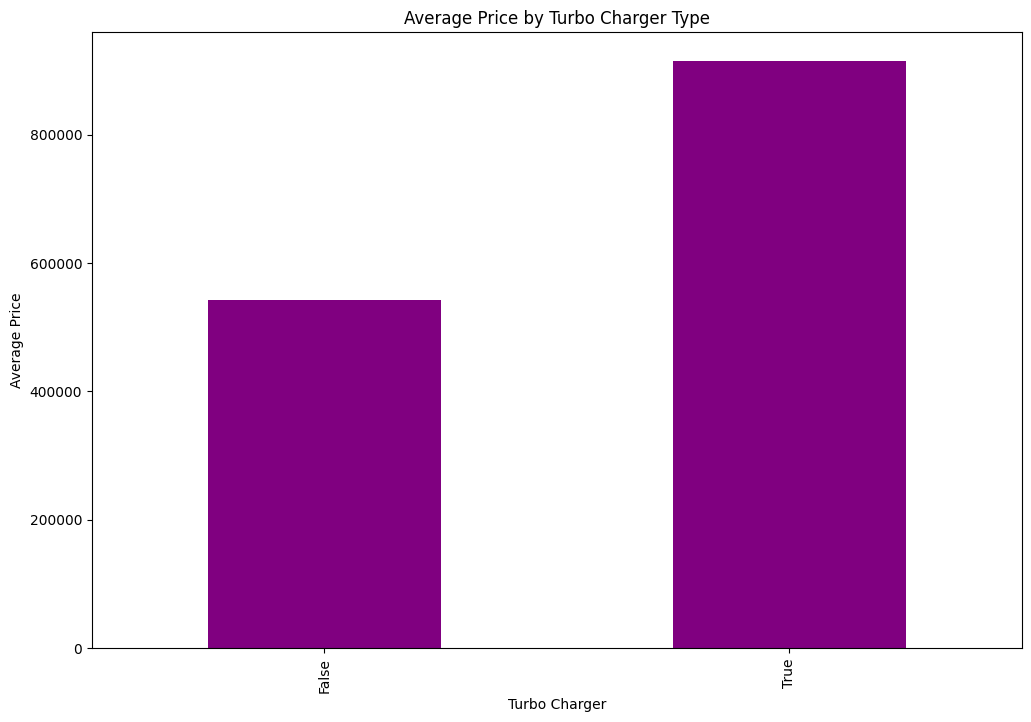

In [72]:
plt.figure(figsize=(12, 8))
average_prices = df_cars.groupby('Turbo Charger')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='purple')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Type')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

In [73]:
print(df_cars['Gear Box'].value_counts())
print(df_cars['Gear Box'].nunique())
print(df_cars['Gear Box'].unique())
print(df_cars['Gear Box'].isna().sum())

Gear Box
5 Speed                                   3579
6 Speed                                    702
5-Speed                                    397
5 Speed                                    151
CVT                                        137
6-Speed                                    125
6 Speed                                    108
4 Speed                                    103
7 Speed                                     91
5                                           84
5 Speed CVT                                 43
5 speed                                     35
6-speed                                     31
9 Speed                                     30
7-Speed DCT                                 24
7 Speed DCT                                 16
7-Speed                                     15
4 Speed                                     11
6 Speed IMT                                 10
AGS                                          9
4-Speed                                      9
IVT 

In [74]:
df_cars.drop('Gear Box',axis=1,inplace= True)

In [75]:
df_cars['Drive Type'] = df_cars['Drive Type'].replace({
    # Front-Wheel Drive
    'FWD': 'Front-Wheel Drive (FWD)',
    'FWD ': 'Front-Wheel Drive (FWD)',
    'Front Wheel Drive': 'Front-Wheel Drive (FWD)',
    
    # Rear-Wheel Drive
    'RWD': 'Rear-Wheel Drive (RWD)',
    'Rear Wheel Drive with ESP': 'Rear-Wheel Drive (RWD)',
    'RWD(with MTT)': 'Rear-Wheel Drive (RWD)',
    
    # All-Wheel Drive
    'AWD': 'All-Wheel Drive (AWD)',
    'All Wheel Drive': 'All-Wheel Drive (AWD)',
    'Permanent all-wheel drive quattro': 'All-Wheel Drive (AWD)',
    'AWD INTEGRATED MANAGEMENT': 'All-Wheel Drive (AWD)',
    
    # Four-Wheel Drive
    '4WD': 'Four-Wheel Drive (4WD)',
    '4 WD': 'Four-Wheel Drive (4WD)',
    '4X4': 'Four-Wheel Drive (4WD)',
    '4x4': 'Four-Wheel Drive (4WD)',
    
    # Two-Wheel Drive
    '2WD': 'Front-Wheel Drive (FWD)',
    '2WD ': 'Front-Wheel Drive (FWD)',
    '2 WD': 'Front-Wheel Drive (FWD)',
    '4X2': 'Two-Wheel Drive (2WD)',
    '4x2': 'Two-Wheel Drive (2WD)',
    'Two Wheel Drive': 'Two-Wheel Drive (2WD)',
    
   })

df_cars['Drive Type']=df_cars['Drive Type'].fillna('Undefined')
print(df_cars['Drive Type'].value_counts())
print(df_cars['Drive Type'].isna().sum())

Drive Type
Front-Wheel Drive (FWD)    4574
Undefined                   984
Rear-Wheel Drive (RWD)      122
Two-Wheel Drive (2WD)        93
All-Wheel Drive (AWD)        30
Four-Wheel Drive (4WD)       19
Name: count, dtype: int64
0


In [76]:
df_cars.drop('Drive Type',axis=1,inplace= True)

In [77]:
print(df_cars['Steering Type'].value_counts())
print(df_cars['Steering Type'].nunique())
print(df_cars['Steering Type'].unique())
print(df_cars['Steering Type'].isna().sum())

Steering Type
Power         4443
Electric      1065
Electronic      43
Electrical      40
power           29
Manual          29
EPAS             9
Name: count, dtype: int64
7
['Power' 'power' 'Electric' nan 'EPAS' 'Electrical' 'Electronic' 'Manual']
164


In [78]:
df_cars['Steering Type'] = df_cars['Steering Type'].replace({
    # Combined Power Systems
    'Power': 'Power',
    'power': 'Power',
    'Electric': 'Power',
    'electric': 'Power',
    'Electronic': 'Power', 
    'Electrical': 'Power', 
    'EPAS': 'Power',
    # Specific Steering Types
    'Manual': 'Manual',
    
})
print(df_cars['Steering Type'].value_counts())

Steering Type
Power     5629
Manual      29
Name: count, dtype: int64


In [79]:
df_cars.drop('Steering Type',axis=1,inplace= True)

In [80]:
print(df_cars['Front Brake Type'].value_counts())
print(df_cars['Front Brake Type'].nunique())
print(df_cars['Front Brake Type'].unique())
print('\n',df_cars['Rear Brake Type'].value_counts())
print(df_cars['Rear Brake Type'].nunique())
print(df_cars['Rear Brake Type'].unique())

Front Brake Type
Disc                   3820
Ventilated Disc        1726
Disc                     67
Solid Disc               63
Disc & Caliper Type      40
Ventilated Discs         32
Disk                     23
Ventilated Disc          10
Ventilated Disk          10
Ventlated Disc            6
Vantilated Disc           5
ABS                       1
Ventilated disc           1
Name: count, dtype: int64
13
['Ventilated Disc' 'Disc' 'Disc ' 'Disc & Caliper Type' 'Ventilated Discs'
 'Ventilated Disc ' nan 'Solid Disc' 'Disk' 'Ventilated Disk'
 'Vantilated Disc' 'ABS' 'Ventlated Disc' 'Ventilated disc']

 Rear Brake Type
Drum                     5256
Disc                      375
Discs                      82
Disc & Caliper Type        40
Solid Disc                 21
Leading-Trailing Drum      17
Disc & Drum                 7
Drum                        6
Name: count, dtype: int64
8
['Drum' 'Discs' 'Disc & Caliper Type' 'Disc' 'Leading-Trailing Drum' nan
 'Solid Disc' 'Disc & Drum' 'Drum

In [81]:
df_cars.drop(['Front Brake Type','Rear Brake Type'],axis=1,inplace= True)

In [82]:
print(df_cars['Tyre Type'].value_counts())
print(df_cars['Tyre Type'].nunique())
print(df_cars['Tyre Type'].unique())

Tyre Type
Tubeless,Radial           2805
Tubeless, Radial          1046
Tubeless                  1028
Tubeless Tyres             371
Radial, Tubeless           179
Radial                     106
Radial, Tubless             82
Tubeless Tyres, Radial      54
Tubeless Radial Tyres       50
Tubeless,Radial             43
tubeless tyre               14
Radial,Tubeless              5
Radial Tubeless              4
Tubeless Tyre                2
Name: count, dtype: int64
14
['Tubeless, Radial' 'Tubeless,Radial' 'Tubeless' 'Radial, Tubless'
 'Radial' 'Tubeless,Radial ' 'Radial, Tubeless' 'Tubeless Radial Tyres'
 'Tubeless Tyres' 'Radial,Tubeless' nan 'Tubeless Tyres, Radial'
 'Radial Tubeless' 'tubeless tyre' 'Tubeless Tyre']


In [83]:
df_cars.drop('Tyre Type',axis=1,inplace= True)
df_cars.head()

,ft,km,transmission,oem,model,modelYear,price,Insurance Validity,Color,Displacement,Turbo Charger,Super Charger,Location,RTO_grouped
0,Petrol,120000.0,Manual,Maruti,Maruti Celerio,2015,400000.0,Third Party,White,998.0,False,False,Bangalore,Karnataka
1,Petrol,32706.0,Manual,Ford,Ford Ecosport,2018,811000.0,Comprehensive,White,1497.0,False,False,Bangalore,Karnataka
2,Petrol,11949.0,Manual,Tata,Tata Tiago,2018,585000.0,Comprehensive,Red,1199.0,False,False,Bangalore,Karnataka
3,Petrol,17794.0,Manual,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,Other,1197.0,False,False,Bangalore,Karnataka
5,Diesel,20000.0,Manual,Jeep,Jeep Compass,2020,1900000.0,Third Party,Other,1956.0,True,False,Bangalore,Karnataka


In [84]:
df_cars.to_csv('Cleaned_data.csv', index=False)

#    Model DEVELOPMENT

In [86]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 840.2 kB/s eta 0:02:29
   ---------------------------------------- 0.8/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 1.3/124.9 MB 1.2 MB/s eta 0:01:45
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:32
    --------------------------------------- 2.1/124.9 MB 1.4 MB/s eta 0:01:27
    --------------------------------------- 2.4/124.9 MB 1.4 MB/s eta 0:01:26
    --------------------------------------- 2.9/124.9 MB 1.5 MB/s eta 0:01:22
   - -------------------------------------- 3.1/124.9 MB 1.5 MB/s eta 0:01:21
   - -------

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


df_cars_final = pd.read_csv('Cleaned_data.csv')

categorical_features = df_cars_final.select_dtypes(include=['object']).columns
numerical_features = df_cars_final.select_dtypes(include=['number']).columns

# Separate the target variable
X = df_cars_final.drop('price', axis=1)
y = df_cars_final['price']

# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# The numerical columns are automatically included as they are

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [90]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Store the results
results = {}

In [91]:
# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
    
    # Store the results
    results[model_name] = {
        'MSE_train': mse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAPE_train': mape_train,
        'MSE_test': mse_test,
        'MAE_test':mae_test,
        'R2_test': r2_test,
        'MAPE_test': mape_test
    }


In [92]:
results_df = pd.DataFrame(results).T
print(results_df)

                      MSE_train     MAE_train  R2_train  MAPE_train  \
Linear Regression  2.252191e+10  87790.837777  0.868642   17.817111   
Decision Tree      2.733849e+07    421.301267  0.999841    0.091738   
Random Forest      1.415152e+09  24069.556536  0.991746    4.334610   
XGBoost            1.873535e+09  31841.475864  0.989073    6.284670   

                       MSE_test      MAE_test   R2_test  MAPE_test  
Linear Regression  3.003520e+10  95169.603698  0.855401  17.711798  
Decision Tree      1.674772e+10  83286.948498  0.919371  14.785516  
Random Forest      1.044166e+10  65641.856373  0.949731  11.804877  
XGBoost            9.105742e+09  62126.955536  0.956162  11.012952  


In [93]:
## For Random Forest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_distributions_rf,
    n_iter=50,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)
best_rf_params = rf_random_search.best_params_
print(f"Best Random Forest Parameters: {best_rf_params}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [94]:
## For XGBoost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'alpha': [0, 0.1, 0.5, 1],
    'lambda': [0, 0.1, 0.5, 1]
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_distributions_xgb,
    n_iter=50,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)
best_xgb_params = xgb_random_search.best_params_
print(f"Best XGBoost Parameters: {best_xgb_params}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Parameters: {'alpha': 0.5, 'colsample_bytree': np.float64(0.6705331755251293), 'lambda': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': np.float64(0.9386696766904905)}


In [95]:
# Initialize and train the Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=300, 
                                 max_depth=30, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)

# Calculate metrics for the training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf) * 100

# Print metrics for the training set
print(f"Random Forest Train MSE: {mse_train_rf}")
print(f"Random Forest Train R^2: {r2_train_rf}")
print(f"Random Forest Train MAPE: {mape_train_rf}%")

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics for the test set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf) * 100

# Print metrics for the test set
print(f"Random Forest Test MSE: {mse_test_rf}")
print(f"Random Forest Test R^2: {r2_test_rf}")
print(f"Random Forest Test MAPE: {mape_test_rf}%")

Random Forest Train MSE: 1375650689.3846986
Random Forest Train R^2: 0.991976608906221
Random Forest Train MAPE: 4.282000075965209%
Random Forest Test MSE: 10154768903.409386
Random Forest Test R^2: 0.9511117890723896
Random Forest Test MAPE: 11.676132789158867%


In [96]:
# Initialize and train the XGBoost model with best parameters
xgb_model = XGBRegressor(alpha=1, 
                         colsample_bytree=0.8329611783087483, 
                         lambda_=1, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         n_estimators=300, 
                         subsample=0.7361074625809747, 
                         objective='reg:squarederror',
                         random_state=42)

xgb_model.fit(X_train, y_train)


# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train)

# Calculate metrics
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100

print(f"XGBoost Train MSE: {mse_train_xgb}")
print(f"XGBoost Train R^2: {r2_train_xgb}")
print(f"XGBoost Train MAPE: {mape_train_xgb}%")

# Make predictions
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100

print(f"XGBoost Test MSE: {mse_test_xgb}")
print(f"XGBoost Test R^2: {r2_test_xgb}")
print(f"XGBoost Test MAPE: {mape_test_xgb}%")

XGBoost Train MSE: 2555182325.27857
XGBoost Train R^2: 0.9850970691398473
XGBoost Train MAPE: 7.464087049798556%
XGBoost Test MSE: 8186456793.7548
XGBoost Test R^2: 0.9605878548010598
XGBoost Test MAPE: 10.628389362135437%


In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}
# Store the results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
    
    # Store the results
    results[model_name] = {
        'MSE_train': mse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAPE_train': mape_train,
        'MSE_test': mse_test,
        'MAE_test':mae_test,
        'R2_test': r2_test,
        'MAPE_test': mape_test
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     MSE_train     MAE_train  R2_train  MAPE_train  \
Ridge Regression  2.277980e+10  88973.717104  0.867138   18.070426   
Lasso Regression  2.252202e+10  87796.115530  0.868642   17.817766   

                      MSE_test      MAE_test   R2_test  MAPE_test  
Ridge Regression  3.053536e+10  96003.307469  0.852993  17.954062  
Lasso Regression  3.003892e+10  95164.984365  0.855383  17.711917  


#   Model 

In [98]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [99]:
encoded_columns = list(X_encoded.columns)
joblib.dump(encoded_columns, 'encoded_columns.pkl')

['encoded_columns.pkl']